# DATA PREPARATION

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Print the shapes of the loaded data
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)



Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


In [4]:
# Optionally, you can print a sample image and label
sample_image = train_images[0]
sample_label = train_labels[0]
print("Sample Image:")
print(sample_image)
print("Sample Label:", sample_label)

Sample Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

In [5]:
# Data Exploration
print(f"Number of training samples: {len(train_images)}")
print(f"Number of test samples: {len(test_images)}")
print(f"Image shape: {train_images[0].shape}")

Number of training samples: 60000
Number of test samples: 10000
Image shape: (28, 28)


# Data Preprocessing


In [6]:
# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Split data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


# Model Building

In [7]:



cnn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])


cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3225 - accuracy: 0.9060 - val_loss: 0.1662 - val_accuracy: 0.9515
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1584 - accuracy: 0.9532 - val_loss: 0.1253 - val_accuracy: 0.9636
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1183 - accuracy: 0.9645 - val_loss: 0.0981 - val_accuracy: 0.9709
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0975 - accuracy: 0.9695 - val_loss: 0.0852 - val_accuracy: 0.9745
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0811 - accuracy: 0.9742 - val_loss: 0.0879 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0697 - accuracy: 0.9773 - val_loss: 0.0813 - val_accuracy: 0.9754
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0620 - accuracy: 0.9799 - val_loss: 0.0844 - val_accuracy:

# Model Evaluation

In [8]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')



313/313 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9771
Test accuracy: 0.9771000146865845


In [9]:
# Make predictions on the test data
predictions = cnn_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 956us/step


In [10]:

report = classification_report(test_labels, predicted_labels, zero_division=1)

# Generate Classification Report and Confusion Matrix
print(report)



              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# DATA VISUALIZATION

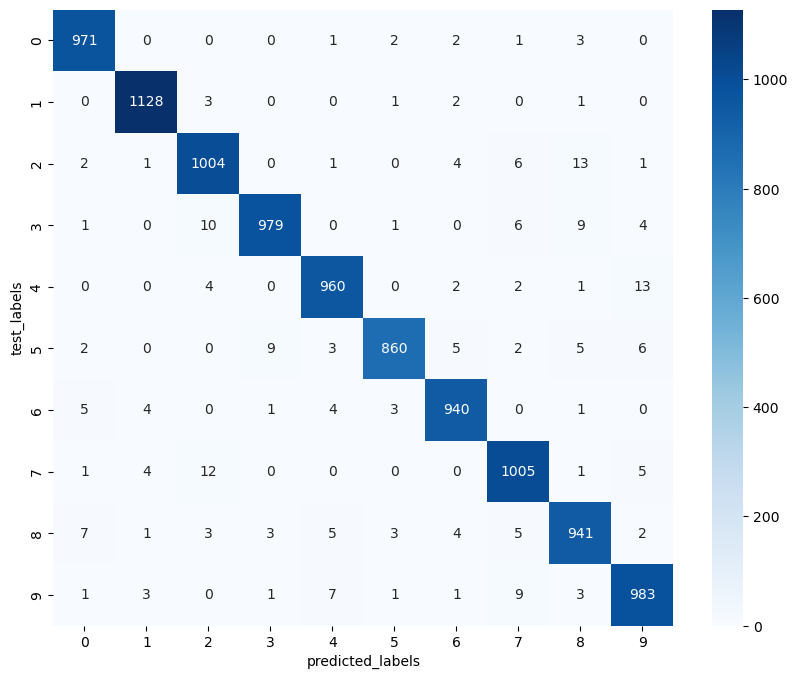

In [11]:


# Calculate the confusion matrix (assuming you have actual and predicted labels)
confusion_mtx = confusion_matrix(test_labels,predicted_labels )

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted_labels')
plt.ylabel('test_labels')
plt.show()


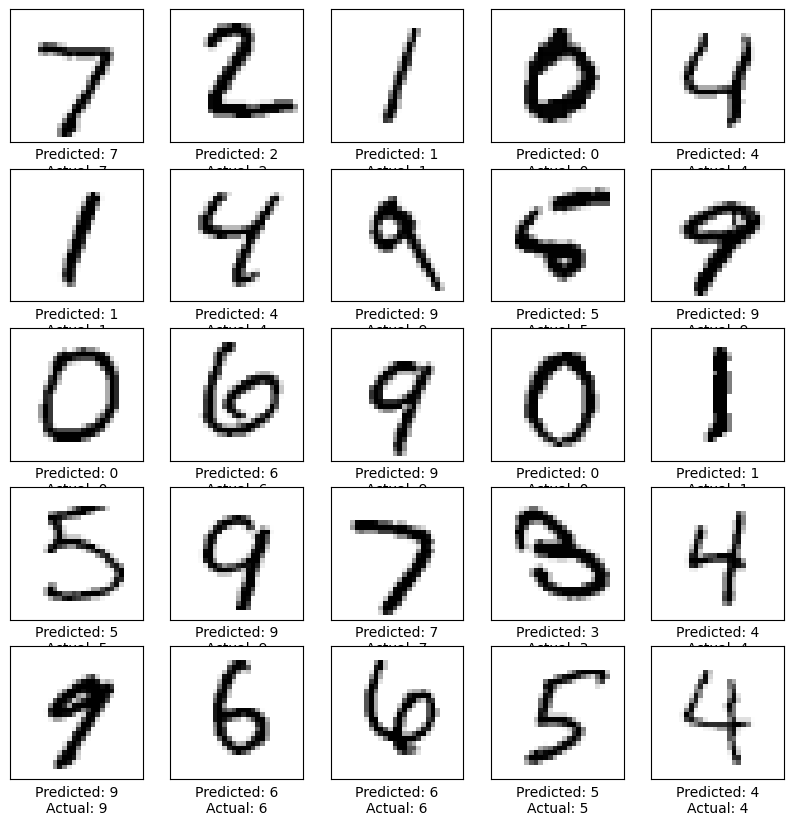

In [12]:
# Visualize some test images and their predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}')
plt.show()

In [13]:
# Select an image from the test set
image_idx = 0  # Change this to view activations for a different image
sample_image = test_images[image_idx]

# Flatten the image
sample_image_flattened = sample_image.reshape(1, 784)  # Reshape to (1, 784)

# Create a model for intermediate layer visualization
layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = keras.Model(inputs=cnn_model.input, outputs=layer_outputs)

# Get intermediate activations for the flattened sample image
activations = activation_model.predict(sample_image_flattened)




1/1 [==============================] - 0s 38ms/step


In [14]:
for layer in cnn_model.layers:
    print(layer.name)


dense
dropout
dense_1


1/1 [==============================] - 0s 16ms/step


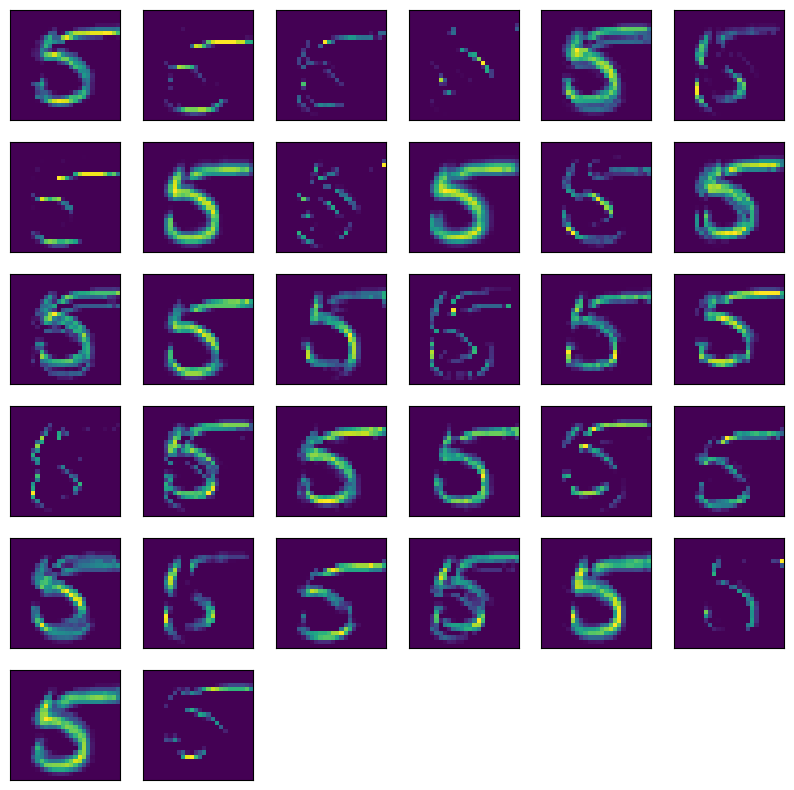

In [15]:

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images for CNN (add a channel dimension)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Define and compile your CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Visualize feature maps for a specific convolutional layer
layer_name = 'conv2d'  # Change this to the layer you want to visualize (e.g., 'conv2d_1')
sample_image = train_images[0]

activation_model = keras.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer(layer_name).output)
activations = activation_model.predict(sample_image.reshape(1, 28, 28, 1))

plt.figure(figsize=(10, 10))
for i in range(32):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(activations[0, :, :, i], cmap='viridis')
plt.show()

1/1 [==============================] - 0s 39ms/step


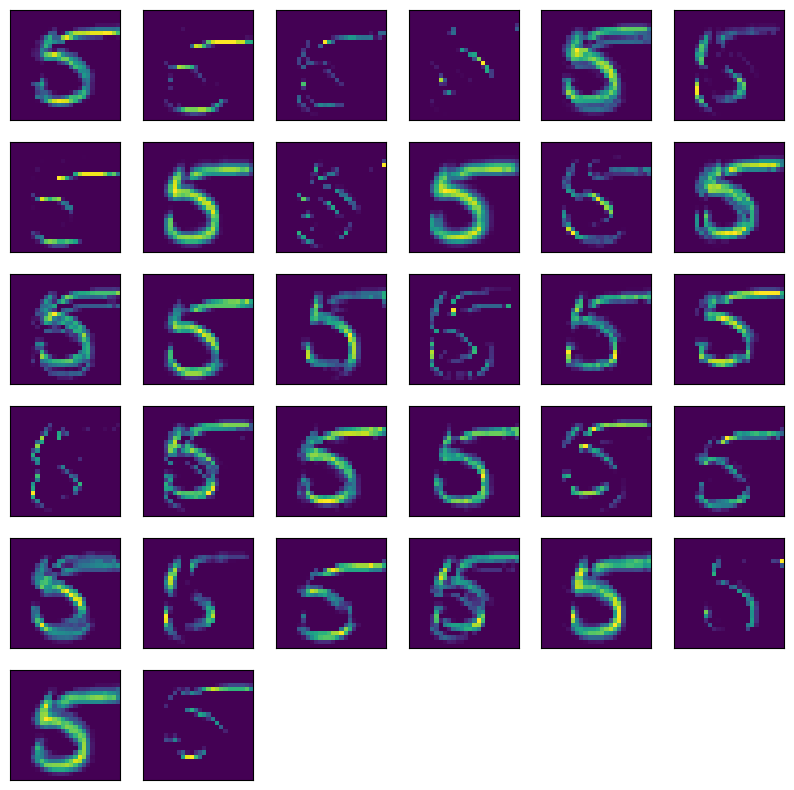

In [16]:

# Visualize feature maps for a specific convolutional layer
layer_name = 'conv2d'  # Change this to the layer you want to visualize (e.g., 'conv2d_3')
sample_image = train_images[0]

activation_model = keras.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer(layer_name).output)
activations = activation_model.predict(sample_image.reshape(1, 28, 28, 1))

plt.figure(figsize=(10, 10))
for i in range(32):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(activations[0, :, :, i], cmap='viridis')
plt.show()


Epoch 1/5
1500/1500 [==============================] - 26s 17ms/step - loss: 1.0579 - accuracy: 0.6967 - val_loss: 0.4651 - val_accuracy: 0.8710
Epoch 2/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4106 - accuracy: 0.8804 - val_loss: 0.3440 - val_accuracy: 0.9009
Epoch 3/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3396 - accuracy: 0.8995 - val_loss: 0.3081 - val_accuracy: 0.9082
Epoch 4/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3044 - accuracy: 0.9096 - val_loss: 0.2880 - val_accuracy: 0.9151
Epoch 5/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2795 - accuracy: 0.9156 - val_loss: 0.2642 - val_accuracy: 0.9224


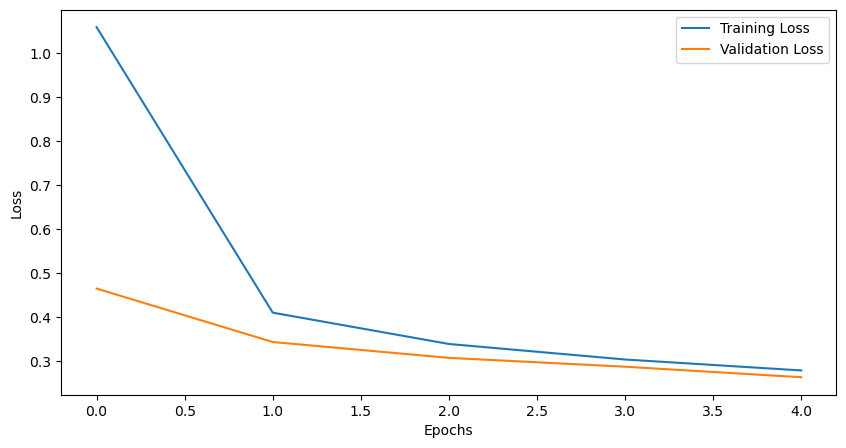

In [17]:

# Access training history for cnn_model
history = cnn_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


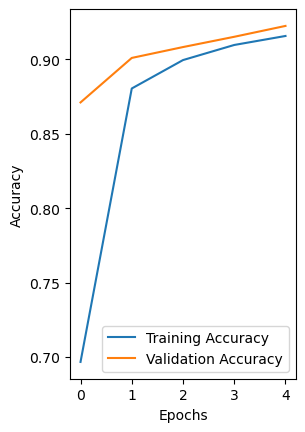

In [18]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

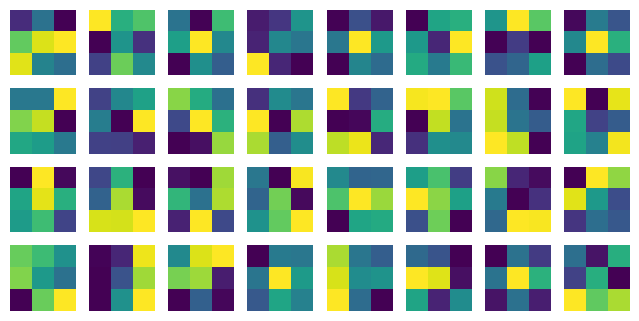

In [19]:
# Get the weights from a convolutional layer
layer_name = 'conv2d'  # Change this to the layer you want to visualize
conv_layer = cnn_model.get_layer(layer_name)
filters, biases = conv_layer.get_weights()

# Plot the filters
plt.figure(figsize=(8, 8))
for i in range(filters.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.show()


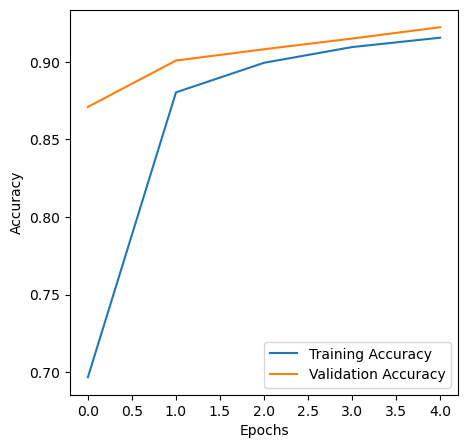

In [20]:
# Plot training and validation accuracy
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
